# **1. Perkenalan Dataset**


- Dataset Mental Health (https://www.kaggle.com/datasets/imtkaggleteam/mental-health) ini adalah sebuah data yang menampung kesehatan mental berdasarkan negara dan tahun
   

# **2. Import Library**

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

In [194]:

df = pd.read_csv("1- mental-illnesses-prevalence.csv")

print(df.head())

print(df.columns)

        Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.223206                                   
1                                           0.222454                                   
2                                           0.221751                                   
3                                           0.220987                                   
4                                           0.220183                                   

   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.996118                                
1                                           4.989290                                
2                                        

# **4. Exploratory Data Analysis (EDA)**

In [195]:

df = pd.read_csv("1- mental-illnesses-prevalence.csv")

jumlah_baris = df.shape[0]
print(f"Jumlah baris: {jumlah_baris}")

jumlah_kolom = len(df.columns)
print("Jumlah kolom:", jumlah_kolom)

Jumlah baris: 6420
Jumlah kolom: 8


In [196]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print("Kolom dengan missing value:")
print(missing_columns)

Kolom dengan missing value:
Code    270
dtype: int64


In [197]:
df['Code'].fillna('Unknown', inplace=True)

C:\Users\Nico\AppData\Local\Temp\ipykernel_17708\2438077974.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Code'].fillna('Unknown', inplace=True)


In [198]:
df.loc[:, 'Code'] = df['Code'].fillna('Unknown')

In [199]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]

print("Kolom dengan missing value:")
print(missing_columns)

Kolom dengan missing value:
Series([], dtype: int64)


Visualisasi Distribusi dengan Histogram

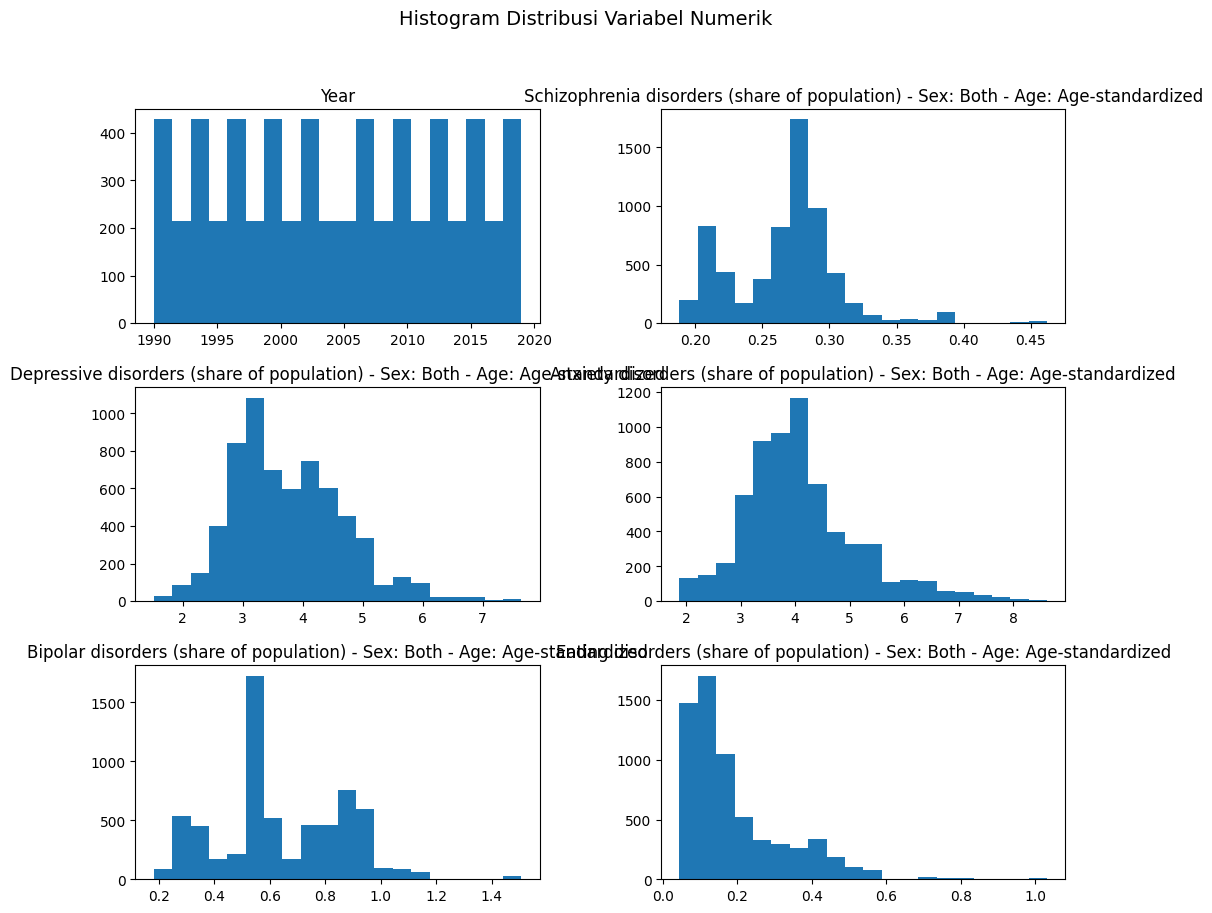

In [200]:

df.hist(figsize=(12, 10), bins=20, grid=False)

plt.suptitle("Histogram Distribusi Variabel Numerik", fontsize=14)
plt.show()

Hubungan antara variabel

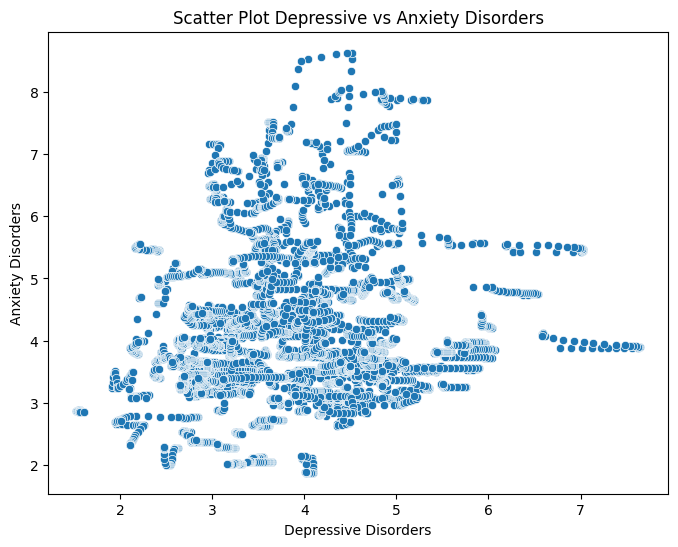

In [201]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Depressive disorders (share of population) - Sex: Both - Age: Age-standardized"], 
                y=df["Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized"])
plt.xlabel("Depressive Disorders")
plt.ylabel("Anxiety Disorders")
plt.title("Scatter Plot Depressive vs Anxiety Disorders")
plt.show()

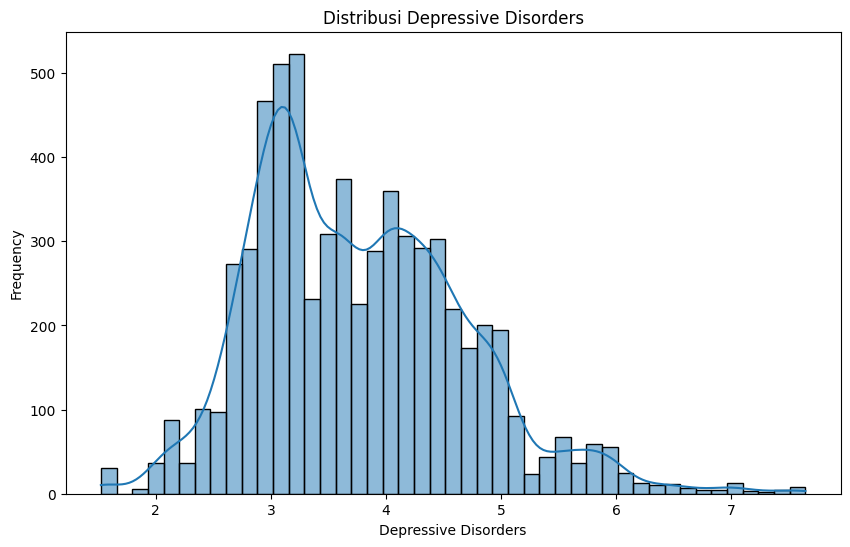

C:\Users\Nico\AppData\Local\Temp\ipykernel_17708\2514322736.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[df["Entity"].isin(top_entities)]["Entity"], order=top_entities, palette="viridis")


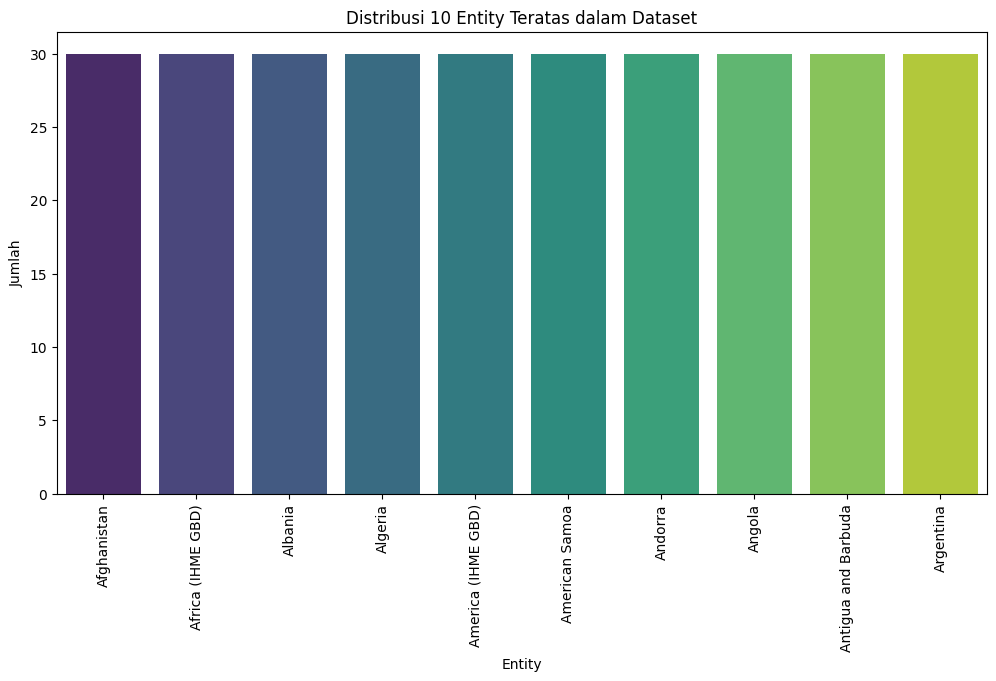

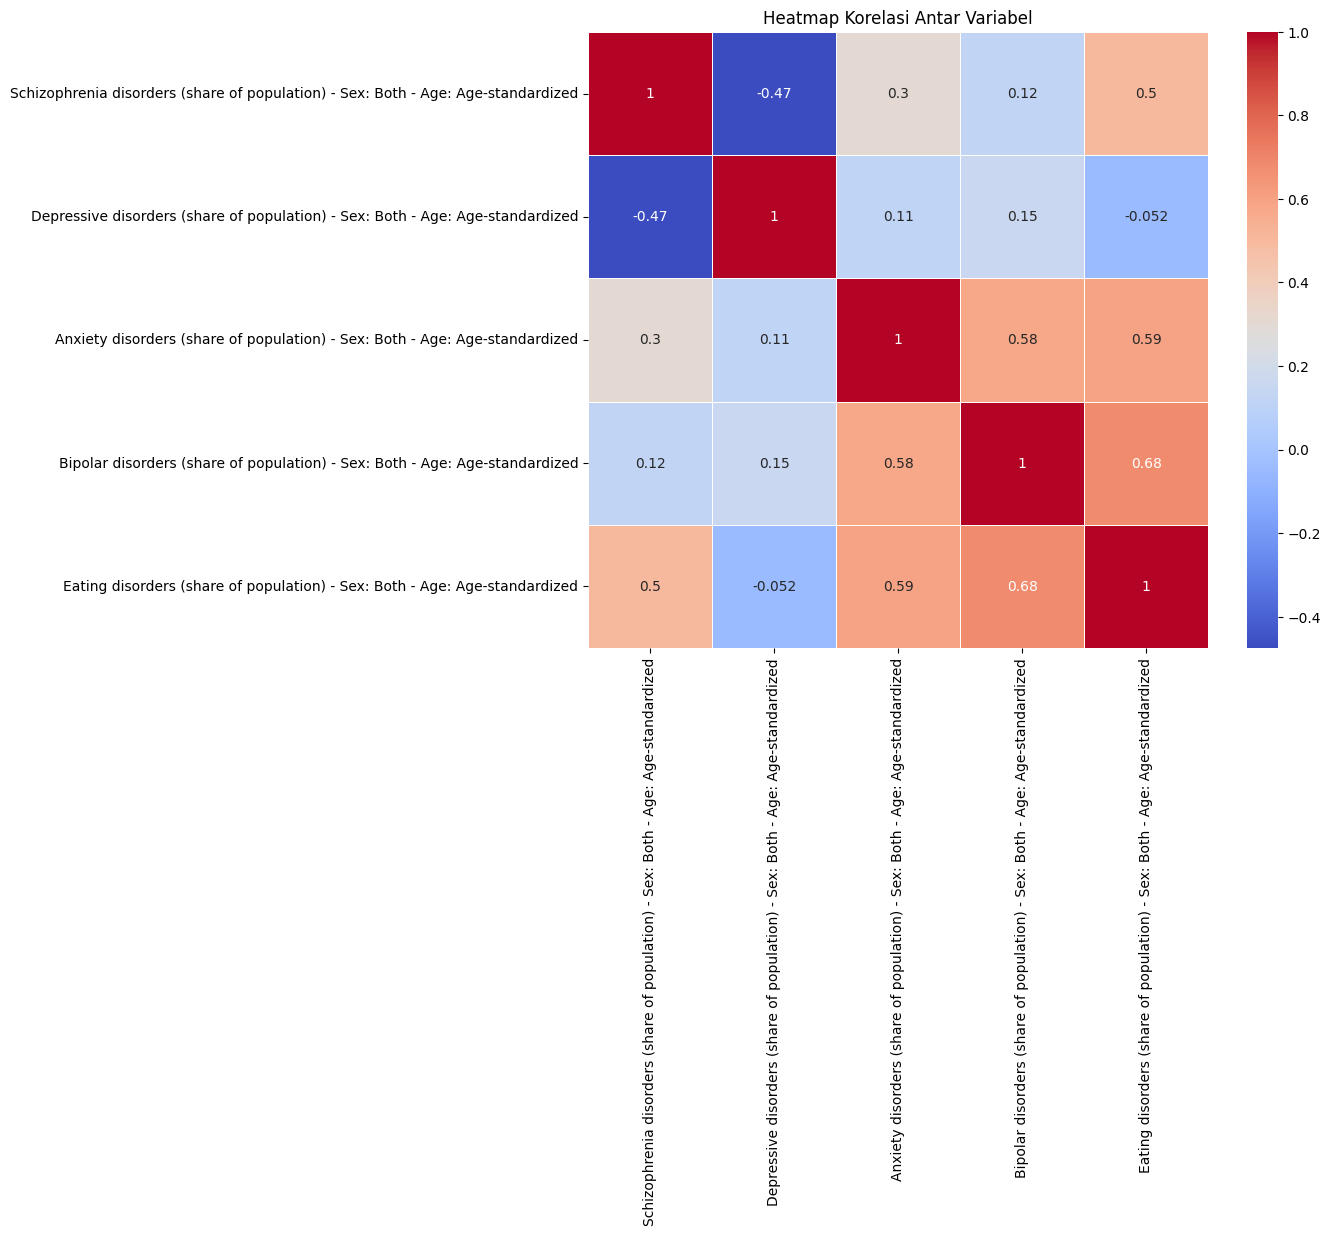

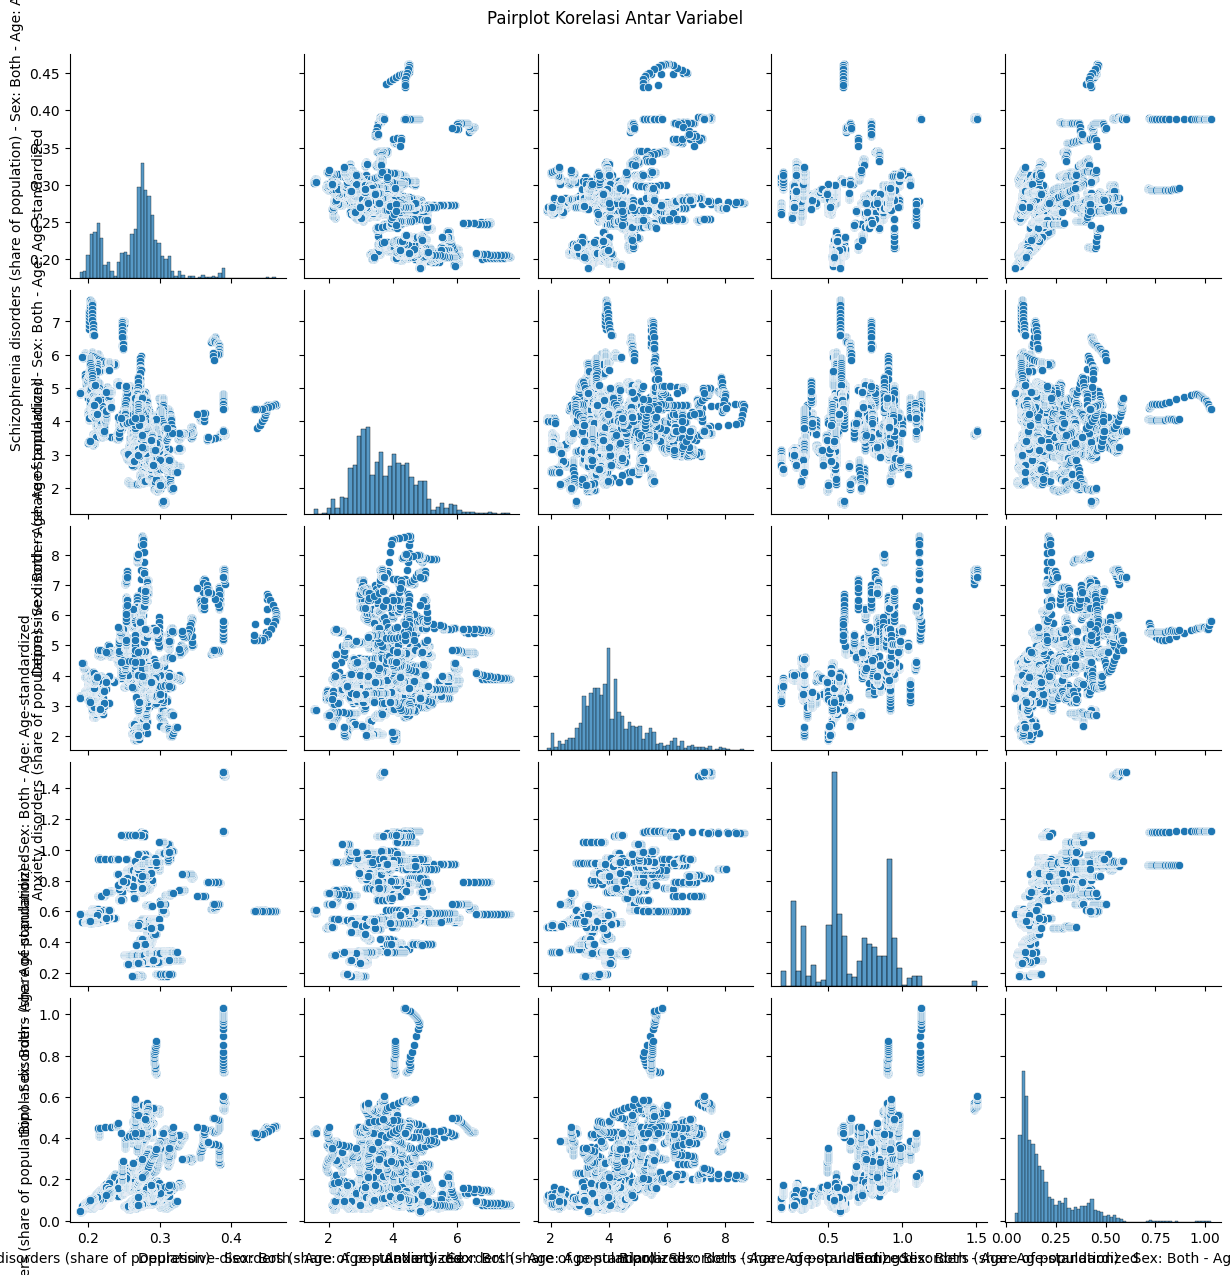

In [202]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'], kde=True)
plt.title('Distribusi Depressive Disorders')
plt.xlabel('Depressive Disorders')
plt.ylabel('Frequency')
plt.show()

entity_counts = df["Entity"].value_counts()
top_entities = entity_counts.head(10).index

plt.figure(figsize=(12, 6))
sns.countplot(x=df[df["Entity"].isin(top_entities)]["Entity"], order=top_entities, palette="viridis")
plt.xticks(rotation=90)
plt.title("Distribusi 10 Entity Teratas dalam Dataset")
plt.xlabel("Entity")
plt.ylabel("Jumlah")
plt.show()

plt.figure(figsize=(10, 8))
correlation_matrix = df[['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized', 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized', 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized', 'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized', 'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

sns.pairplot(df[['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized', 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized', 'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized', 'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized', 'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']])
plt.suptitle('Pairplot Korelasi Antar Variabel', y=1.02)
plt.show()

# **5. Data Preprocessing**

In [203]:
print(df.isnull().sum())

Entity                                                                               0
Code                                                                                 0
Year                                                                                 0
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized    0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized       0
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized          0
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized          0
Eating disorders (share of population) - Sex: Both - Age: Age-standardized           0
dtype: int64


In [204]:
print(f"Jumlah duplikat: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Jumlah duplikat: 0


In [205]:
import pandas as pd

df = pd.read_csv("1- mental-illnesses-prevalence.csv")

print(df.describe())


              Year  \
count  6420.000000   
mean   2004.500000   
std       8.656116   
min    1990.000000   
25%    1997.000000   
50%    2004.500000   
75%    2012.000000   
max    2019.000000   

       Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
count                                        6420.000000                                   
mean                                            0.266604                                   
std                                             0.039383                                   
min                                             0.188416                                   
25%                                             0.242267                                   
50%                                             0.273477                                   
75%                                             0.286575                                   
max                                             0.462045         

In [206]:
from sklearn.preprocessing import StandardScaler

numerical_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numerical_cols]  

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numerical_cols)

print(df_scaled.describe()) 

              Year  \
count  6420.000000   
mean      0.000000   
std       1.000078   
min      -1.675247   
25%      -0.866507   
50%       0.000000   
75%       0.866507   
max       1.675247   

       Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
count                                       6.420000e+03                                   
mean                                       -4.427058e-17                                   
std                                         1.000078e+00                                   
min                                        -1.985490e+00                                   
25%                                        -6.180076e-01                                   
50%                                         1.745328e-01                                   
75%                                         5.071238e-01                                   
max                                         4.962986e+00         

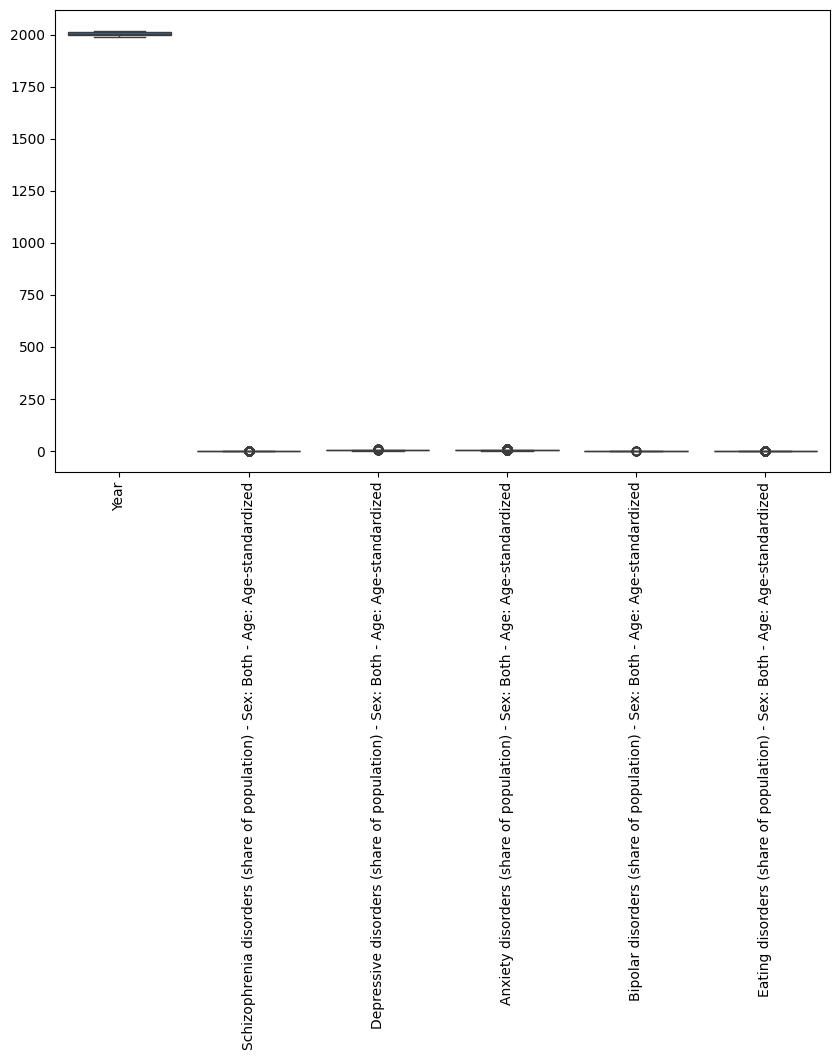

In [207]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

Menggunakan Label Encoding

In [208]:

from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns  
print("Kolom kategorikal:", categorical_columns)

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  
    label_encoders[col] = le  

display(df.head(10)) 

Kolom kategorikal: Index(['Entity', 'Code'], dtype='object')


,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,0,0,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,0,0,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,0,0,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,0,0,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,0,0,1994,0.220183,4.977782,4.670810,0.699898,0.111815
5,0,0,1995,0.219409,4.978228,4.668100,0.699768,0.108507
6,0,0,1996,0.218465,4.981489,4.665759,0.699650,0.105269
7,0,0,1997,0.217286,4.987593,4.665013,0.699597,0.101531
8,0,0,1998,0.216074,4.996858,4.668240,0.699765,0.098050
9,0,0,1999,0.215068,5.004257,4.673557,0.700054,0.095723


Kolom kategorikal: Index(['Entity', 'Code'], dtype='object')


C:\Users\Nico\AppData\Local\Temp\ipykernel_17708\3492522558.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['Entity', 'Year']).mean().reset_index()


,Entity,Year,Code,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,0,1990-1995,0.0,0.221332,4.983287,4.685269,0.700940,0.117535
1,0,1996-2000,0.0,0.216281,4.995729,4.669890,0.699864,0.099090
2,0,2001-2005,0.0,0.214151,4.983792,4.673223,0.699691,0.095172
3,0,2006-2010,0.0,0.215028,4.954368,4.689287,0.699491,0.100895
4,0,2011-2015,0.0,0.217342,4.944733,4.765056,0.699439,0.111246
5,0,2016-2020,0.0,0.218044,4.937329,4.827762,0.699630,0.117208
6,1,1990-1995,205.0,0.219553,4.592421,3.692705,0.607074,0.109638
7,1,1996-2000,205.0,0.219181,4.623711,3.650943,0.606737,0.107570
8,1,2001-2005,205.0,0.219508,4.631933,3.614553,0.606205,0.108797
9,1,2006-2010,205.0,0.219878,4.555962,3.654438,0.605343,0.112955


C:\Users\Nico\AppData\Local\Temp\ipykernel_17708\3492522558.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[df["Entity"].isin(top_entities)]["Entity"], order=top_entities, palette="viridis")


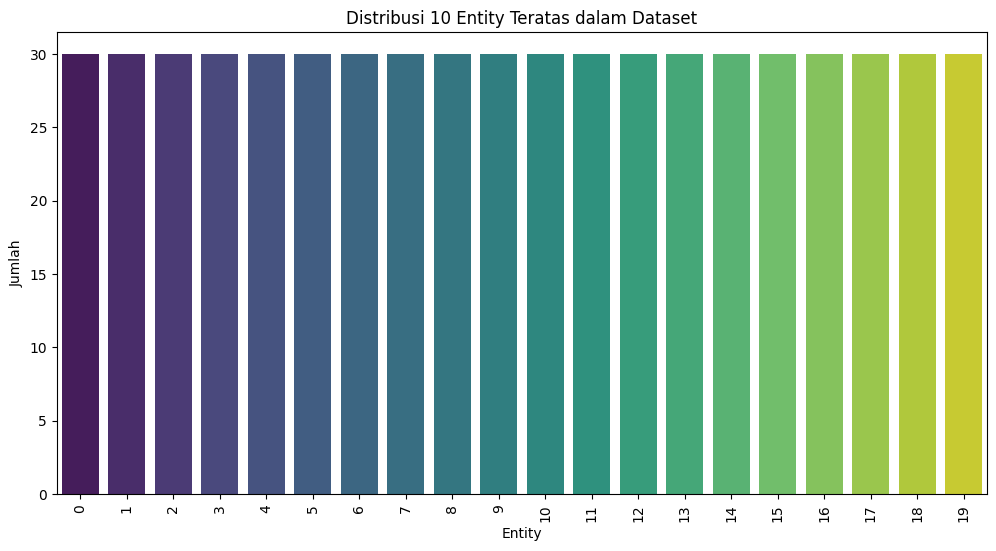

In [209]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("1- mental-illnesses-prevalence.csv")

categorical_columns = df.select_dtypes(include=['object']).columns 
print("Kolom kategorikal:", categorical_columns)

label_encoders = {} 
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col]) 
    label_encoders[col] = le  


df['Year'] = pd.cut(df['Year'], bins=[1989, 1995, 2000, 2005, 2010, 2015, 2020], labels=['1990-1995', '1996-2000', '2001-2005', '2006-2010', '2011-2015', '2016-2020'])

grouped_df = df.groupby(['Entity', 'Year']).mean().reset_index()

display(grouped_df.head(10))

entity_counts = df["Entity"].value_counts()
top_entities = entity_counts.head(20).index

plt.figure(figsize=(12, 6))
sns.countplot(x=df[df["Entity"].isin(top_entities)]["Entity"], order=top_entities, palette="viridis")
plt.xticks(rotation=90)
plt.title("Distribusi 10 Entity Teratas dalam Dataset")
plt.xlabel("Entity")
plt.ylabel("Jumlah")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [210]:

features = [
    "Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized",
    "Depressive disorders (share of population) - Sex: Both - Age: Age-standardized",
    "Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized",
    "Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized",
    "Eating disorders (share of population) - Sex: Both - Age: Age-standardized"
]

X = df[features].values  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
k = 3
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(X_scaled)

labels = kmeans.labels_

df["Cluster"] = labels

def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        
        cluster_data = X[labels == cluster_id]

        mean_values = cluster_data.mean(axis=0) 

        print(f"\nCluster {cluster_id + 1}:")
        for i, feature in enumerate(features):
            print(f"Rata-rata {feature}: {mean_values[i]:.4f}")

analyze_clusters(X_scaled, labels, k)


Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized: 0.4717
Rata-rata Depressive disorders (share of population) - Sex: Both - Age: Age-standardized: -0.7436
Rata-rata Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized: -0.5878
Rata-rata Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized: -0.9628
Rata-rata Eating disorders (share of population) - Sex: Both - Age: Age-standardized: -0.4944

Cluster 2:
Rata-rata Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized: 0.4453
Rata-rata Depressive disorders (share of population) - Sex: Both - Age: Age-standardized: -0.0446
Rata-rata Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized: 0.8512
Rata-rata Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized: 1.0396
Rata-rata Eating disorders (share of population) - Sex: Both - Age: A

## **b. Evaluasi Model Clustering**

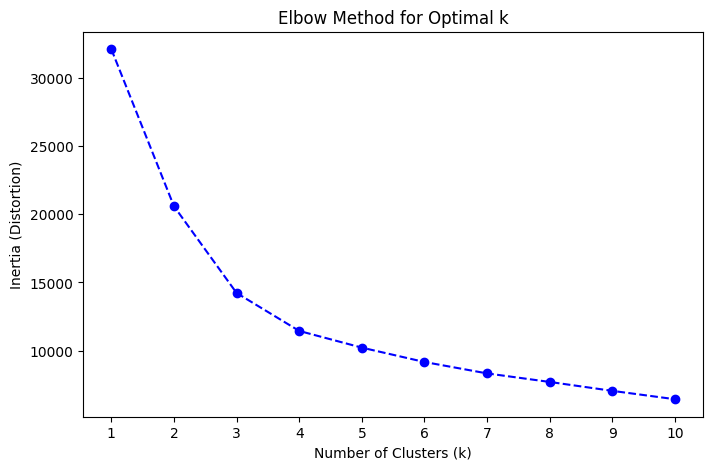

In [211]:

features = ["Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized", "Depressive disorders (share of population) - Sex: Both - Age: Age-standardized", "Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized", "Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized", "Eating disorders (share of population) - Sex: Both - Age: Age-standardized"]  
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--", color="b")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Distortion)")
plt.title("Elbow Method for Optimal k")
plt.xticks(K_range)
plt.show()


In [212]:

from sklearn.metrics import silhouette_score
import numpy as np

silhouette_scores = []
K_range = range(2, 11)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_k}")

Optimal number of clusters based on Silhouette Score: 3


## **d. Visualisasi Hasil Clustering**

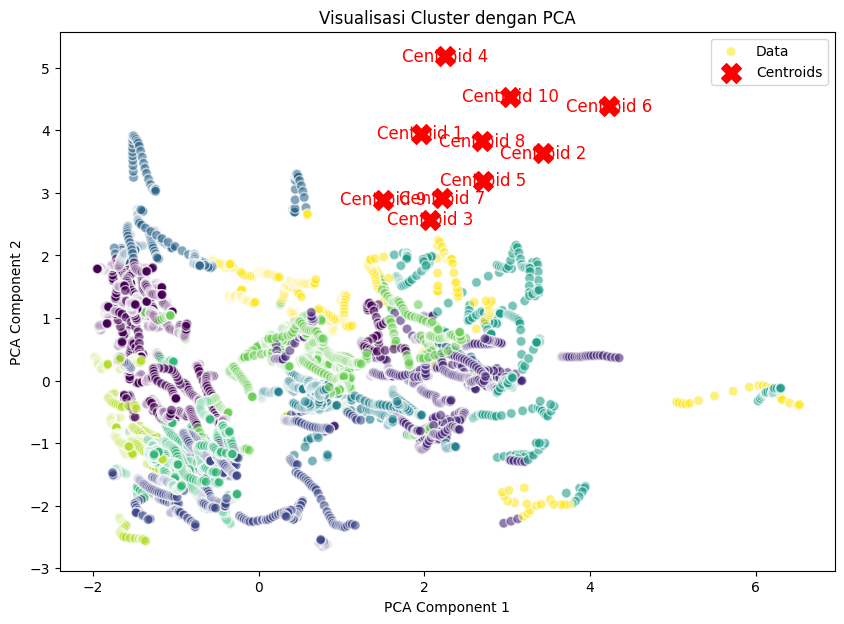

Nilai Centroids dalam PCA:
Centroid 1: PCA1 = 1.95, PCA2 = 3.95
Centroid 2: PCA1 = 3.44, PCA2 = 3.63
Centroid 3: PCA1 = 2.06, PCA2 = 2.57
Centroid 4: PCA1 = 2.25, PCA2 = 5.19
Centroid 5: PCA1 = 2.71, PCA2 = 3.20
Centroid 6: PCA1 = 4.23, PCA2 = 4.39
Centroid 7: PCA1 = 2.22, PCA2 = 2.92
Centroid 8: PCA1 = 2.70, PCA2 = 3.83
Centroid 9: PCA1 = 1.50, PCA2 = 2.89
Centroid 10: PCA1 = 3.03, PCA2 = 4.54


In [213]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o', label="Data")

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', label='Centroids')

for i, centroid in enumerate(centroids_pca):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

plt.title('Visualisasi Cluster dengan PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

plt.show()

print("Nilai Centroids dalam PCA:")
for i, centroid in enumerate(centroids_pca):
    print(f"Centroid {i+1}: PCA1 = {centroid[0]:.2f}, PCA2 = {centroid[1]:.2f}")


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [214]:
df['Cluster'] = kmeans.labels_

In [215]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Entity'] = label_encoder.fit_transform(df['Entity'])

In [216]:
model_kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = model_kmeans.fit_predict(df[['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized', 
                                             'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized', 
                                             'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized', 
                                             'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized', 
                                             'Eating disorders (share of population) - Sex: Both - Age: Age-standardized']])

In [217]:
df['Entity'] = label_encoder.inverse_transform(df['Entity'])

In [218]:
print(df.head()) 

   Entity  Code       Year  \
0       0     0  1990-1995   
1       0     0  1990-1995   
2       0     0  1990-1995   
3       0     0  1990-1995   
4       0     0  1990-1995   

   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.223206                                   
1                                           0.222454                                   
2                                           0.221751                                   
3                                           0.220987                                   
4                                           0.220183                                   

   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.996118                                
1                                           4.989290                                
2                                  

In [219]:
print(df.describe())

            Entity         Code  \
count  6420.000000  6420.000000   
mean    106.500000   106.331776   
std      61.780616    61.503800   
min       0.000000     0.000000   
25%      53.000000    53.000000   
50%     106.500000   106.500000   
75%     160.000000   160.000000   
max     213.000000   205.000000   

       Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
count                                        6420.000000                                   
mean                                            0.266604                                   
std                                             0.039383                                   
min                                             0.188416                                   
25%                                             0.242267                                   
50%                                             0.273477                                   
75%                                     

In [220]:
numeric_columns = df.select_dtypes(include=['number']).columns

cluster_summary = df.groupby('Cluster')[numeric_columns].agg(['mean', 'median', 'min', 'max', 'std'])
pd.options.display.max_columns = None
display(cluster_summary)

Entity                                   Code                  \
               mean median min  max        std        mean median min  max   
Cluster                                                                      
0        101.276018   97.0   0  212  61.696513  102.330317   97.0   0  205   
1         94.708085   91.0   4  205  57.810423   96.085106   88.0   3  205   
2        114.869193  123.0   2  213  62.183991  113.212521  120.0   2  205   

                    \
               std   
Cluster              
0        61.036827   
1        61.808378   
2        60.931567   

        Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
                                                                                     mean   
Cluster                                                                                     
0                                                 0.236577                                  
1                                                 0.292462                                  
2                                                 0.278458                                  

                                                 \
           median       min       max       std   
Cluster                                           
0        0.221503  0.188416  0.383200  0.034578   
1        0.276889  0.214583  0.462045  0.045631   
2        0.282047  0.200450  0.330059  0.023430   

        Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  \
                                                                                  mean   
Cluster                                                                                  
0                                                 4.714568                               
1                                                 3.735551                               
2                                                 3.089260                               

                                                 \
           median       min       max       std   
Cluster                                           
0        4.557709  3.779583  7.645899  0.672003   
1        3.647380  2.159144  5.706180  0.643555   
2        3.108990  1.522333  4.094738  0.456516   

        Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized  \
                                                                               mean   
Cluster                                                                               
0                                                 3.856926                            
1                                                 5.807029                            
2                                                 3.620015                            

                                                 \
           median       min       max       std   
Cluster                                           
0        3.757421  2.637742  5.571912  0.610785   
1        5.543512  4.562548  8.624634  0.819938   
2        3.776603  1.879996  4.938433  0.633404   

        Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized  \
                                                                               mean   
Cluster                                                                               
0                                                 0.636356                            
1                                                 0.896174                            
2                                                 0.537063                            

                                                 \
           median       min       max       std   
Cluster                                           
0        0.579842  0.337485  1.095363  0.153814   
1        0.901738  0.601198  1.506730  0.145358   
2        0.522997  0.181667  1.039103  0.232031   

        Eating disorders (share of po

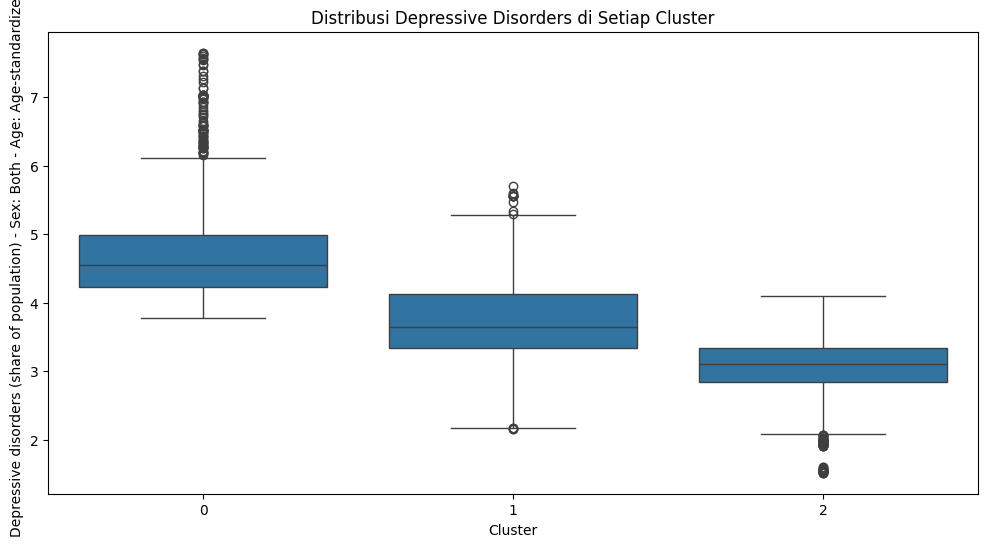

In [221]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Depressive disorders (share of population) - Sex: Both - Age: Age-standardized', data=df)
plt.title('Distribusi Depressive Disorders di Setiap Cluster')
plt.show()

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Entity:** 101.27
- **Rata-rata Code:** 102.33  
- **Schizophrenia Disorders:** 0.23
- **Depressive Disorders:** 4.71
- **Anxiety Disorders:** 3.85
- **Bipolar Disorders:** 0.63
- **Eating Disorders:** 0.15
- **Analisis:** Cluster ini memiliki tingkat gangguan depresi yang paling tinggi (4.71) dibanding cluster lainnya, dengan beberapa outlier di atas 6, namun gangguan kecemasan dan makan relatif rendah.

## Cluster 1:
- **Rata-rata Entity:** 99.70  
- **Rata-rata Code:** 96.08  
- **Schizophrenia Disorders:** 0.29 
- **Depressive Disorders:** 3.73
- **Anxiety Disorders:** 5.80
- **Bipolar Disorders:** 0.89
- **Eating Disorders:** 0.38
- **Analisis:** Cluster ini memiliki tingkat gangguan kecemasan (5.80) dan gangguan makan (0.38) tertinggi, dengan tingkat depresi (3.73) dan bipolar (0.89), menunjukkan kemungkinan hubungan antara kecemasan dan gangguan makan.

## Cluster 2:
- **Rata-rata Entity:** 114.86 
- **Rata-rata Code:** 113.21   
- **Schizophrenia Disorders:** 0.27
- **Depressive Disorders:** 3.08
- **Anxiety Disorders:** 3.62
- **Bipolar Disorders:** 0.53
- **Eating Disorders:** 0.15
- **Analisis:** Cluster ini memiliki tingkat gangguan depresi yang tinggi (3.08), dan memiliki kecemasan dan bipolar yang rendah.

# **7. Mengeksport Data**

In [222]:
df.to_csv('Dataset_clustering1.csv', index=False)